In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#read from file
dataset = pd.read_csv("CanadianCitiesHousePricing.csv", encoding='latin-1')
dataset

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [194]:
#excluse address to avoid overfitting
del dataset["Address"]
#only considering ontario cities
dataset.drop(dataset.loc[dataset['Province'] != 'Ontario'].index, inplace=True)
dataset.drop(dataset.loc[dataset['City'] == 'Saskatoon'].index, inplace=True)
dataset.drop(dataset.loc[dataset['City'] == 'Winnipeg'].index, inplace=True)
dataset.drop(dataset.loc[dataset['City'] == 'Regina'].index, inplace=True)
dataset.drop(dataset.loc[dataset['City'] == 'Nanaimo'].index, inplace=True)

#delete province label
del dataset["Province"]
dataset

,City,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...
31484,Caledon,2099888.0,4,4,76581,43.8667,-79.8667,133000.0
31485,Caledon,995000.0,3,3,76581,43.8667,-79.8667,133000.0
31486,Caledon,1199000.0,4,4,76581,43.8667,-79.8667,133000.0
31487,Caledon,1499900.0,4,2,76581,43.8667,-79.8667,133000.0


In [195]:
#check for missing values
dataset.info()
#if missing, can drop null values through: dataset.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14003 entries, 0 to 31488
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  14003 non-null  object 
 1   Price                 14003 non-null  float64
 2   Number_Beds           14003 non-null  int64  
 3   Number_Baths          14003 non-null  int64  
 4   Population            14003 non-null  int64  
 5   Latitude              14003 non-null  float64
 6   Longitude             14003 non-null  float64
 7   Median_Family_Income  14003 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 984.6+ KB


In [196]:
#split data into x and y values
x = dataset.drop(columns=["Price"])
y = dataset["Price"]

#split into test and train data - stratify based on city to account for differences in number
#of data records for each city
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, stratify=x["City"])

In [197]:
#get train data
trainDataset = xTrain.join(yTrain)

array([[<Axes: title={'center': 'Number_Beds'}>,
        <Axes: title={'center': 'Number_Baths'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Median_Family_Income'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

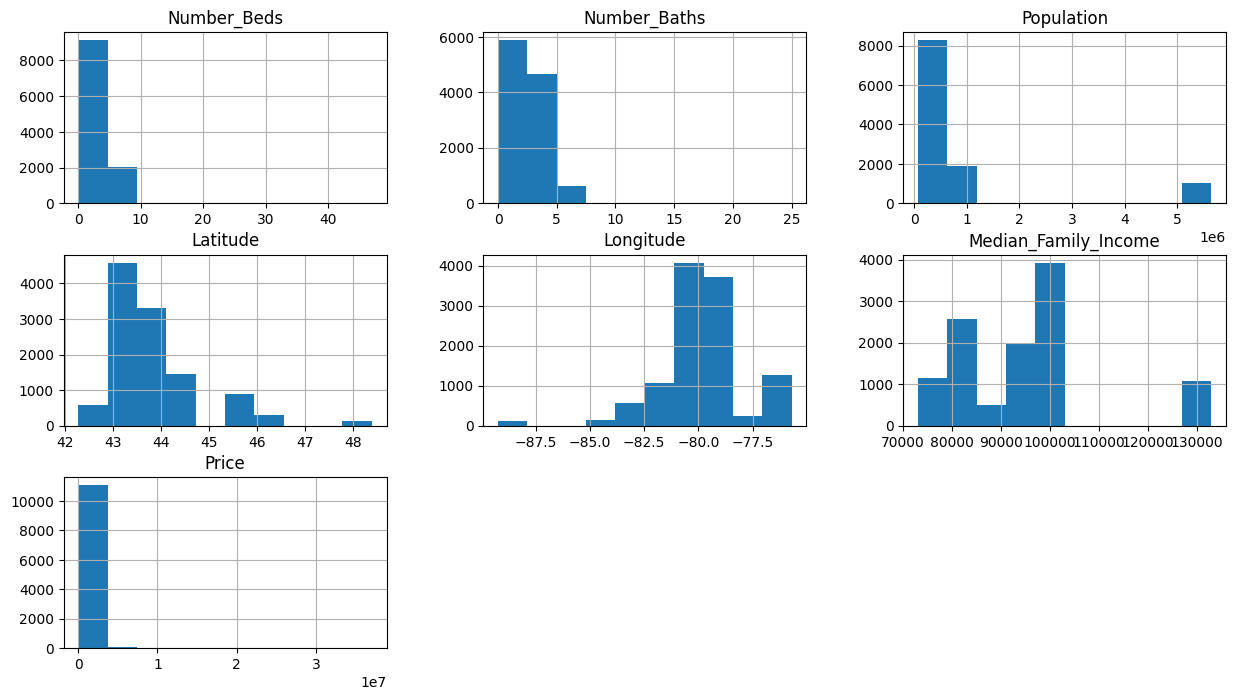

In [198]:
trainDataset.hist(figsize=(15,8))

<ipython-input-199-f90dbad9d4f5>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trainDataset.corr(), annot = True, cmap="YlGnBu")


<Axes: >

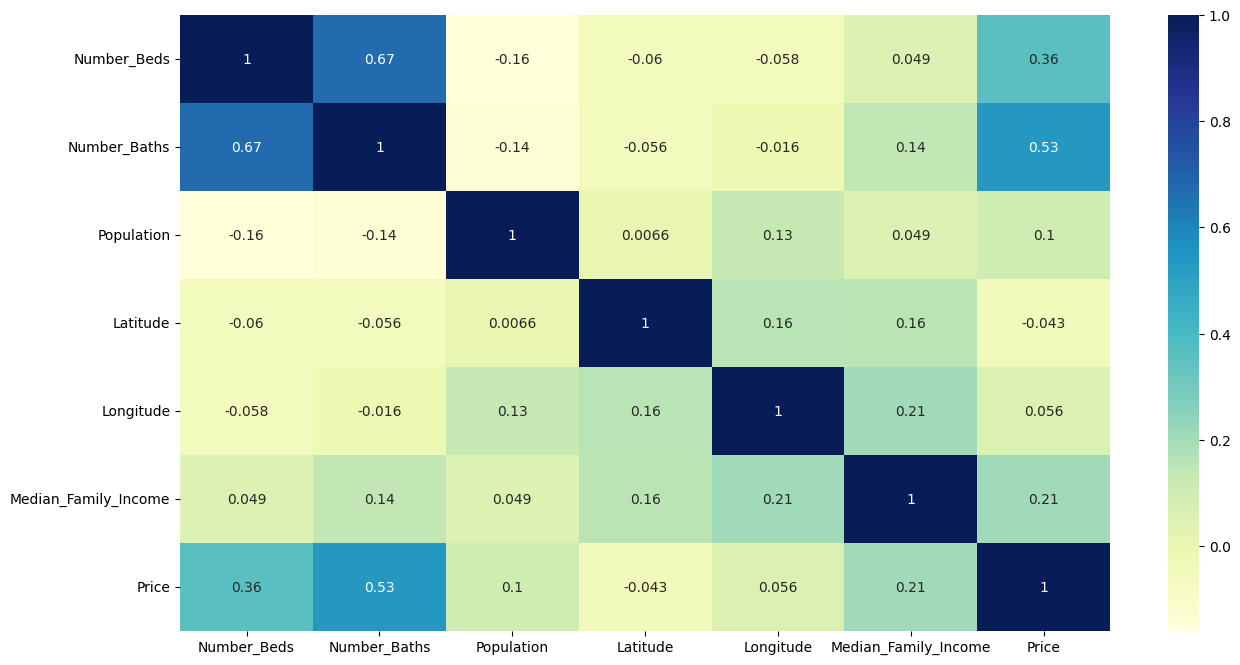

In [199]:
#set figure size
plt.figure(figsize = (15,8))
#visualize correlation between x and y
#trainDataset.corr() - correlation matrix
#annot = True - numerical annotations
#cmap - color map (Yellow = high correlation, Blue = low)
sns.heatmap(trainDataset.corr(), annot = True, cmap="YlGnBu")

In [200]:
#apply log transformation to address skewed distributions - +1 added to avoid issues with -ve or 0 values
trainDataset["Number_Beds"] = np.log(trainDataset["Number_Beds"] + 1)
trainDataset["Number_Baths"] = np.log(trainDataset["Number_Baths"] + 1)
trainDataset["Population"] = np.log(trainDataset["Population"] + 1)
trainDataset["Price"] = np.log(trainDataset["Price"] + 1)
#predictionsLogScale = model.predict(testDataset)
#convert predictions back to the original scale
#predictedPrices = np.expm1(predictionsLogScale)

array([[<Axes: title={'center': 'Number_Beds'}>,
        <Axes: title={'center': 'Number_Baths'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Median_Family_Income'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

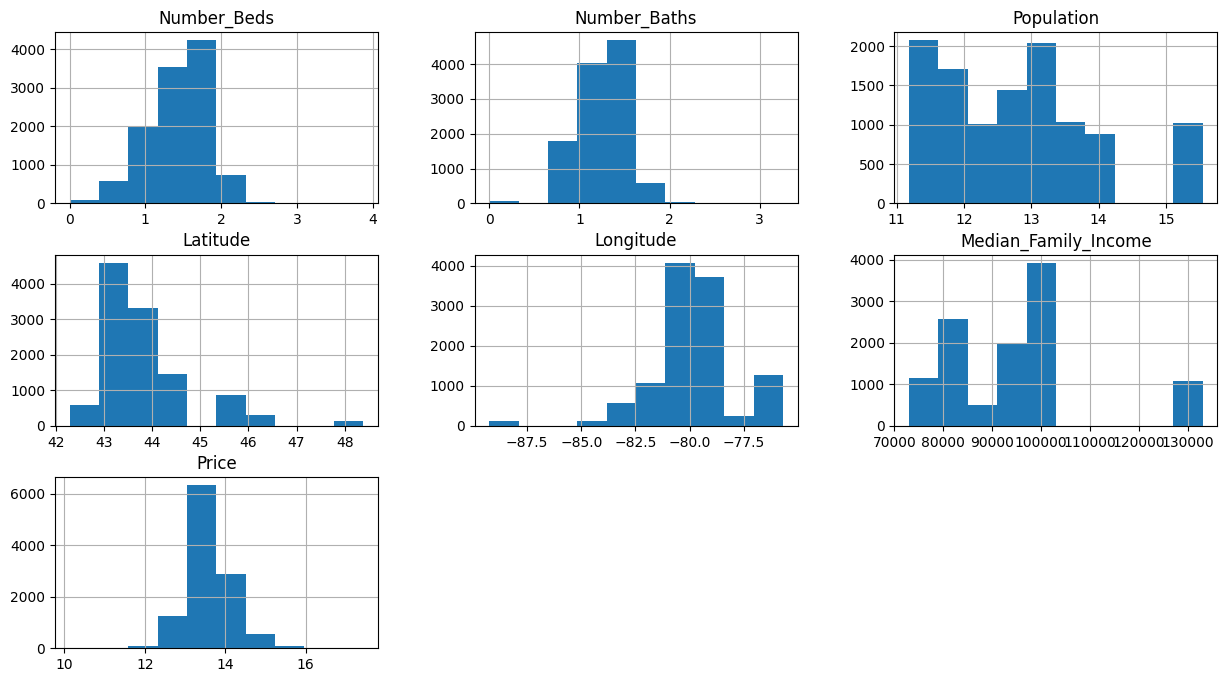

In [201]:
#regenerate histogram
trainDataset.hist(figsize=(15,8))

In [202]:
#one hot encoding - represent city as binary vectors
#identify categories
trainDataset.City.value_counts()

London              1076
Caledon             1069
Hamilton            1031
Toronto             1021
St. Catharines      1014
Kitchener            959
Ottawa               877
Oshawa               866
Barrie               810
Windsor              576
Brantford            502
Kingston             389
Guelph               349
Peterborough         246
Sudbury              162
Sault Ste. Marie     132
Thunder Bay          123
Name: City, dtype: int64

In [203]:
#one hot encoding using pandas - add to dataset
trainDataset = trainDataset.join(pd.get_dummies(trainDataset.City)).drop(["City"], axis = 1)

In [204]:
trainDataset

,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Price,Barrie,Brantford,Caledon,...,London,Oshawa,Ottawa,Peterborough,Sault Ste. Marie,St. Catharines,Sudbury,Thunder Bay,Toronto,Windsor
7453,1.609438,1.098612,13.500198,43.2567,-79.8692,91000.0,13.171155,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7230,1.386294,1.386294,13.500198,43.2567,-79.8692,91000.0,13.997750,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12648,1.609438,1.386294,12.724718,43.9000,-78.8500,102000.0,13.457407,0,0,0,...,0,1,0,0,0,0,0,0,0,0
21165,1.609438,1.386294,11.825442,44.2313,-76.4810,83000.0,13.710040,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11227,1.609438,1.386294,12.398596,43.1833,-79.2333,77000.0,14.151269,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31291,1.386294,1.098612,11.246117,43.8667,-79.8667,133000.0,13.541075,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17993,1.609438,1.386294,11.949094,44.3711,-79.6769,97000.0,13.493928,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12451,1.945910,1.609438,12.724718,43.9000,-78.8500,102000.0,14.037855,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23317,1.791759,1.386294,11.347980,44.3000,-78.3167,79000.0,13.710151,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

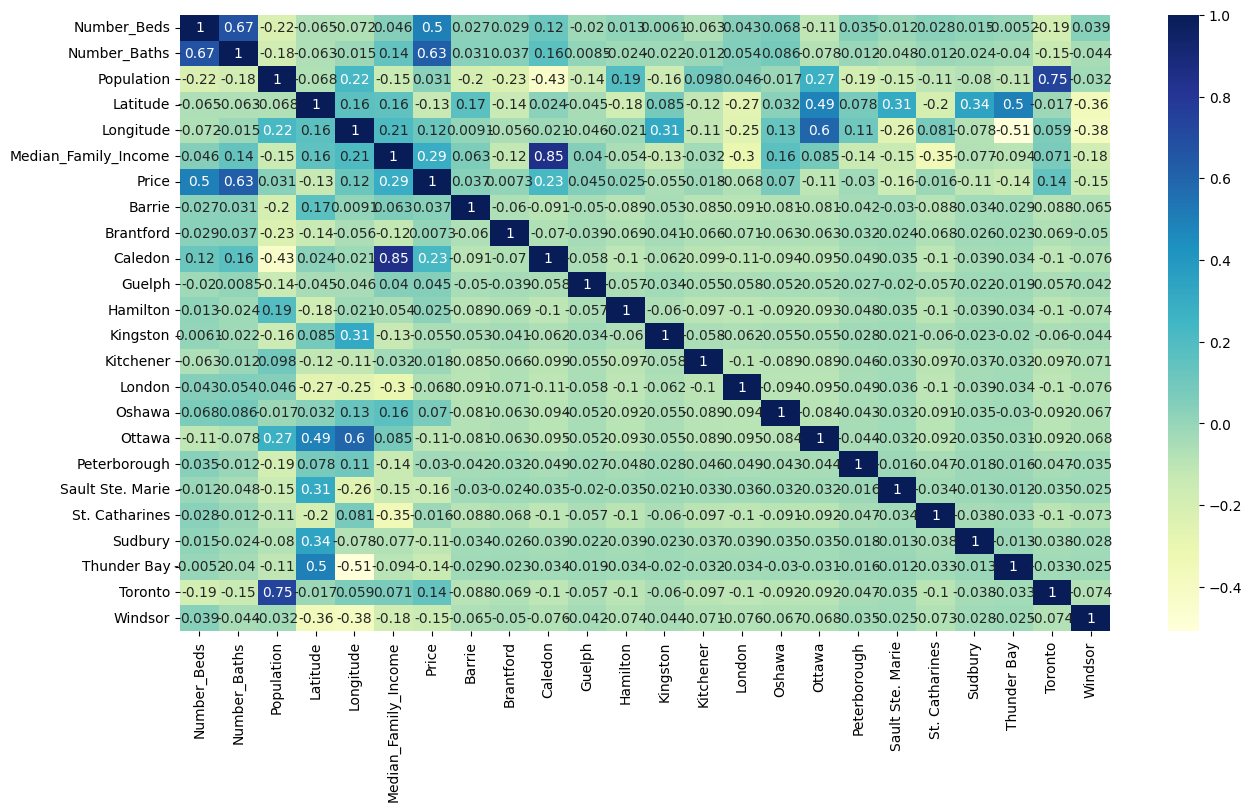

In [205]:
#see new heatmap
plt.figure(figsize = (15,8))
sns.heatmap(trainDataset.corr(), annot = True, cmap="YlGnBu")

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='Latitude', ylabel='Longitude'>

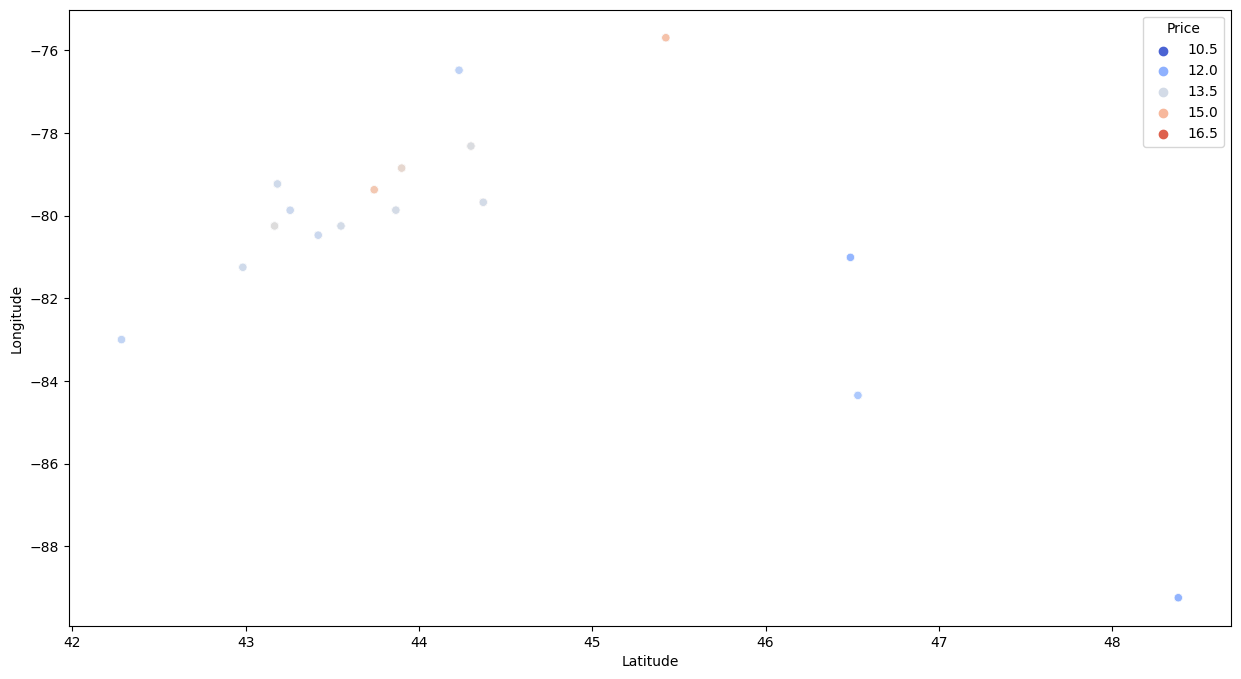

In [206]:
#get min and max prices
minPrice = dataset['Price'].min()
maxPrice = dataset['Price'].max()


#visualize coordinates
plt.figure(figsize=(15,8))
sns.scatterplot(x="Latitude", y="Longitude", data=trainDataset, hue="Price", palette="coolwarm", vmin=minPrice, vmax=maxPrice)


In [207]:
#set xTrain and yTrain according to trainDataset changes
xTrain = trainDataset.drop(columns=["Price"])
yTrain = trainDataset["Price"]

#scaler
scaler = StandardScaler()
xTrainS = scaler.fit_transform(xTrain)

reg = LinearRegression()

#fit data
reg.fit(xTrainS, yTrain)

LinearRegression()

In [208]:
#set up testing data
testDataset = xTest.join(yTest)
testDataset["Number_Beds"] = np.log(testDataset["Number_Beds"] + 1)
testDataset["Number_Baths"] = np.log(testDataset["Number_Baths"] + 1)
testDataset["Population"] = np.log(testDataset["Population"] + 1)
testDataset["Price"] = np.log(testDataset["Price"] + 1)
testDataset = testDataset.join(pd.get_dummies(testDataset.City)).drop(["City"], axis = 1)

#split
xTest, yTest = testDataset.drop(["Price"], axis = 1), testDataset["Price"]

#set scaled test
xTestS = scaler.transform(xTest)

In [209]:
reg.score(xTestS, yTest)

0.5718804463996244

In [213]:
#test with random forest regressor
forest = RandomForestRegressor()

#fit data
forest.fit(xTrainS, yTrain)

#score
forest.score(xTestS, yTest)

0.6164087274926637

In [225]:
#new regressor
forest = RandomForestRegressor()

#hyperparameter grid to guide learning process - costs more comp. time
#n_estimators: number of estimators (models in the ensemble, i.e. decision tree for random forest)
#max_features: max number of features to consider for splitting a node in a decision tree
#min_samples_split: minimum number of samples a node must have before it can be split
paramGrid = {
    "n_estimators": [100, 200, 300],
    "max_features" : [8, 12],
    "min_samples_split": [8, 12, 20],
    "max_depth": [None, 4, 6],
}
#GridSearchCV(model, hyper parameters, number of folds in cross-validation, focus on minimizing negative mean squared error - neg = minimize, whether to include scores)
gridSearch = GridSearchCV(forest, paramGrid, cv = 5, scoring = "neg_mean_squared_error", return_train_score=True)

#fit grid search onto training data
gridSearch.fit(xTrainS, yTrain)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 6], 'max_features': [8, 12],
                         'min_samples_split': [8, 12, 20],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [226]:
#find best hyperparameters for this model
bestForest = gridSearch.best_estimator_
bestForest

RandomForestRegressor(max_features=12, min_samples_split=20, n_estimators=200)

In [227]:
bestForest.score(xTestS, yTest)

0.6185325179514787